In [25]:
import os

import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as pl
from collections import Counter
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
# Load the dataset
data = pd.read_csv("C:\\Users\\Hasan\\Desktop\\data science folder\\AAPL_historical_data.csv")

# Display basic information
print(data.head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [27]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non-null  float64
 4   Close         10998 non-null  float64
 5   Adj Close     10998 non-null  float64
 6   Volume        10998 non-null  int64  
 7   Dividends     10998 non-null  float64
 8   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 773.4+ KB
None


In [28]:
# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values
data = data.dropna()  # Drop rows with missing values
# OR
data.fillna(method='ffill', inplace=True)  # Forward-fill missing data


Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


C:\Users\Hasan\AppData\Local\Temp\ipykernel_14284\1568880614.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward-fill missing data


In [29]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)  # Set Date as the index if it's time-series data


In [30]:
print(data.describe())


               Open          High           Low         Close     Adj Close  \
count  10998.000000  10998.000000  10998.000000  10998.000000  10998.000000   
mean      22.299160     22.539055     22.068367     22.312754     21.494496   
std       46.003685     46.496031     45.540929     46.037660     45.561916   
min        0.049665      0.049665      0.049107      0.049107      0.037857   
25%        0.299107      0.303710      0.290179      0.298549      0.241840   
50%        0.531250      0.537946      0.522321      0.531250      0.432079   
75%       20.204196     20.389554     19.998036     20.196160     17.253029   
max      236.479996    237.229996    233.089996    234.820007    234.548523   

             Volume     Dividends  Stock Splits  
count  1.099800e+04  10998.000000  10998.000000  
mean   3.180806e+08      0.000752      0.001546  
std    3.354523e+08      0.011753      0.083663  
min    0.000000e+00      0.000000      0.000000  
25%    1.132545e+08      0.000000     

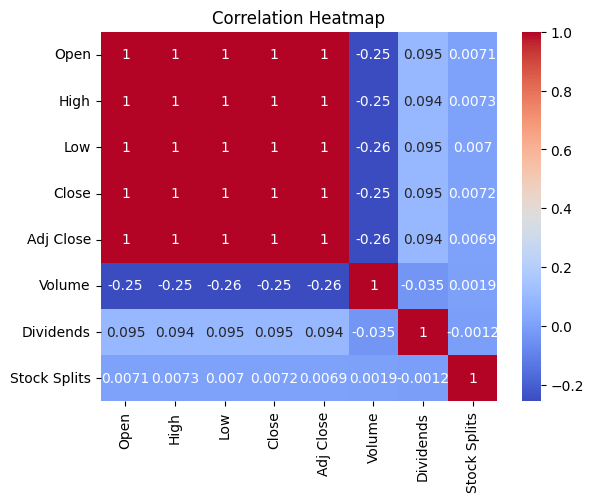

In [31]:
# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


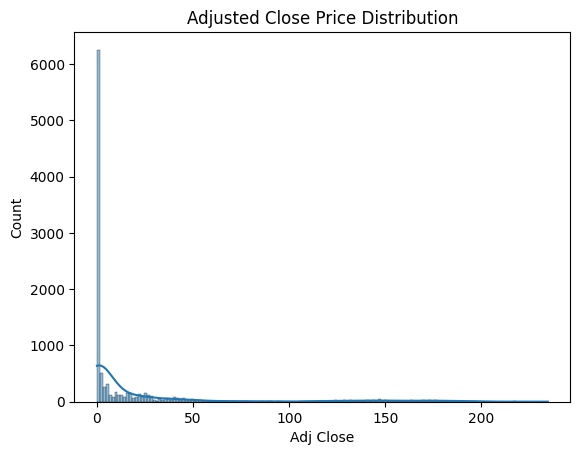

In [32]:
sns.histplot(data['Adj Close'], kde=True)
plt.title("Adjusted Close Price Distribution")
plt.show()



In [33]:
print(data.shape)  # Check rows and columns


(10998, 8)


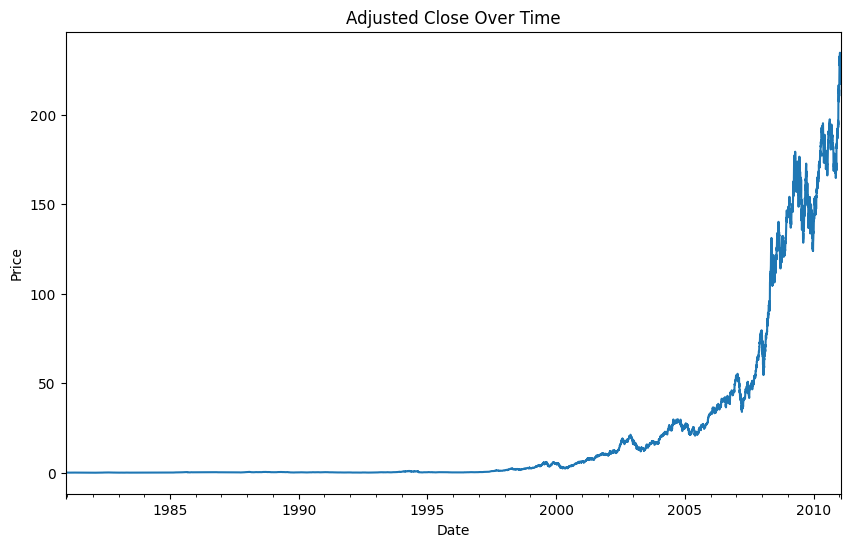

In [34]:
#Time-Series Plot
data['Date'] = pd.date_range(start='1980-12-12', periods=len(data))  # Replace with actual date column
data.set_index('Date', inplace=True)

data['Adj Close'].plot(figsize=(10, 6), title="Adjusted Close Over Time", ylabel="Price")
plt.show()


In [41]:
#Calculate Daily Returns
data['Daily_Return'] = data['Adj Close'].pct_change()
print(data[['Adj Close', 'Daily_Return']])


             Adj Close  Daily_Return
Date                                
1980-12-12    0.098943           NaN
1980-12-13    0.093781     -0.052171
1980-12-14    0.086898     -0.073398
1980-12-15    0.089049      0.024751
1980-12-16    0.091630      0.028992
...                ...           ...
2011-01-17  218.287323     -0.028754
2011-01-18  217.238556     -0.004805
2011-01-19  217.708008      0.002161
2011-01-20  217.987686      0.001285
2011-01-21  218.547043      0.002566

[10998 rows x 2 columns]


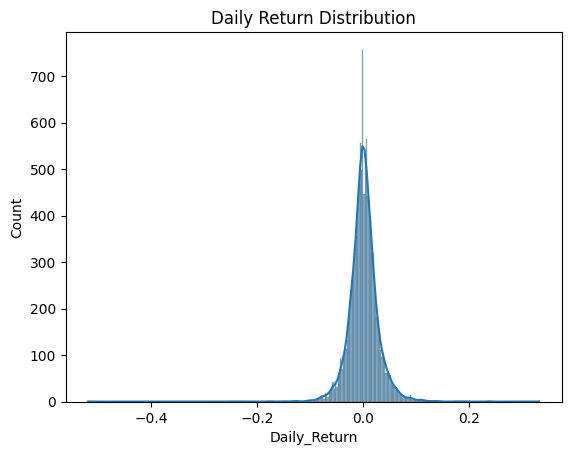

In [42]:
sns.histplot(data['Daily_Return'].dropna(), kde=True)
plt.title("Daily Return Distribution")
plt.show()



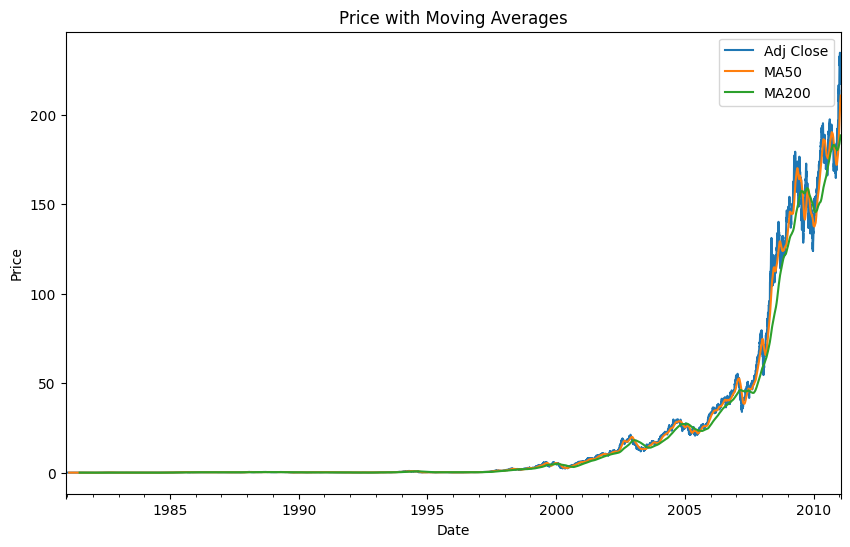

In [43]:
data['MA50'] = data['Adj Close'].rolling(window=50).mean()  # 50-day moving average
data['MA200'] = data['Adj Close'].rolling(window=200).mean()

data[['Adj Close', 'MA50', 'MA200']].plot(figsize=(10, 6))
plt.title("Price with Moving Averages")
plt.ylabel("Price")
plt.show()


In [46]:
#Handle Stock Splits and Dividends
print(data[data['Stock Splits'] > 0])  # Identify rows with stock splits


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1985-06-13    0.370536    0.372768    0.339286    0.370536    0.286080   
1994-06-16    0.901786    1.016741    0.898438    0.993304    0.838821   
1997-09-04    1.595714    1.612143    1.570000    1.602143    1.352970   
2004-01-26   23.174999   23.469999   22.937500   23.424999   20.696278   
2008-05-13  127.580002  131.000000  126.000000  129.039993  126.103653   

               Volume  Dividends  Stock Splits        MA50      MA200  \
Date                                                                    
1985-06-13  342720000        0.0           2.0    0.262145   0.185060   
1994-06-16  490000000        0.0           2.0    0.785016   0.757357   
1997-09-04  651610400        0.0           2.0    1.110551   0.727267   
2004-01-26  301660000        0.0           7.0   18.224037  16.767322   
2008-05-13  225702700        0.0           

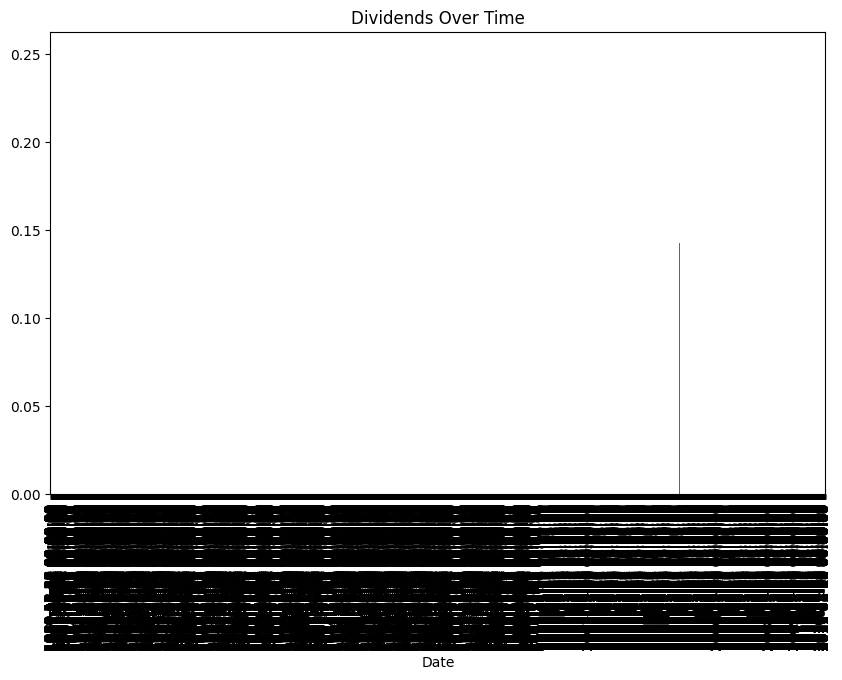

In [47]:
#Visualize Dividends:

data['Dividends'].plot(kind='bar', figsize=(10, 6))
plt.title("Dividends Over Time")
plt.show()